### **IMPORTING THE LIBRARIES & LOADING THE DATA**

In [ ]:
# Importing the necessary libraries
!pip install boruta
import numpy as np 
import pandas as pd 
# For Data Visualization 
import seaborn as sns                       
import matplotlib.pyplot as plt  
from prettytable import PrettyTable                      
import warnings 
warnings.filterwarnings('ignore')   # for ignoring warnings in notebook
# add graphs into colab notebook       
%matplotlib inline                          

import statsmodels.api as sm                        
from sklearn import model_selection                                  
from sklearn.model_selection import train_test_split      
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler      # Scaling
from sklearn.impute import SimpleImputer

# getting methods for confusion matrix, F1 score, Accuracy Score
from sklearn import metrics                                          
from sklearn.metrics import confusion_matrix,f1_score,accuracy_score,classification_report,roc_curve,auc,average_precision_score

from sklearn.linear_model import LogisticRegression     # For logistic Regression
from sklearn.naive_bayes import GaussianNB              # For Naive Bayes classifier
from sklearn.neighbors import KNeighborsClassifier      # For K-NN Classifier
from sklearn.svm import SVC                             # For support vector machine based classifier
from sklearn.tree import DecisionTreeClassifier         # For Decision tree

# for ensemble
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

In [ ]:
# loading the dataset - oasis_longitudinal.csv
Data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DATA/oasis_longitudinal.csv")                                                                             # using pandas read_csv function to load dataset into pdData variable
Data.head() 

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


## **DATA CLEANING**

In [ ]:
pdData = Data.copy()     # making a copy of the dataset
print('\033[1mThe Dementia dataset having "{0}" rows and "{1}" columns\033[0m.'.format(pdData.shape[0],pdData.shape[1]))                                         

The Dementia dataset having "373" rows and "15" columns.


In [ ]:
pdData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Subject ID  373 non-null    object 
 1   MRI ID      373 non-null    object 
 2   Group       373 non-null    object 
 3   Visit       373 non-null    int64  
 4   MR Delay    373 non-null    int64  
 5   M/F         373 non-null    object 
 6   Hand        373 non-null    object 
 7   Age         373 non-null    int64  
 8   EDUC        373 non-null    int64  
 9   SES         354 non-null    float64
 10  MMSE        371 non-null    float64
 11  CDR         373 non-null    float64
 12  eTIV        373 non-null    int64  
 13  nWBV        373 non-null    float64
 14  ASF         373 non-null    float64
dtypes: float64(5), int64(5), object(5)
memory usage: 43.8+ KB


In [ ]:
# Converting Categorical Data to Numerical Data
pdData['M/F'] = pdData['M/F'].replace(['M', 'F'], [1,0])
pdData['Group'] = [1 if each == "Demented" or each == "Converted" else 0 for each in pdData['Group']]

In [ ]:
pdData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Subject ID  373 non-null    object 
 1   MRI ID      373 non-null    object 
 2   Group       373 non-null    int64  
 3   Visit       373 non-null    int64  
 4   MR Delay    373 non-null    int64  
 5   M/F         373 non-null    int64  
 6   Hand        373 non-null    object 
 7   Age         373 non-null    int64  
 8   EDUC        373 non-null    int64  
 9   SES         354 non-null    float64
 10  MMSE        371 non-null    float64
 11  CDR         373 non-null    float64
 12  eTIV        373 non-null    int64  
 13  nWBV        373 non-null    float64
 14  ASF         373 non-null    float64
dtypes: float64(5), int64(7), object(3)
memory usage: 43.8+ KB


In [ ]:
# checking missing values in dataset for each attributes / columns 
print("\033[1m Column_Name       No_of_Missing_Values")
print("*"*50)
print("\033[0m{0}".format(pdData.isnull().sum()))
print("\033[1m*"*50)

# checking if any duplicate rows available in the dataset
print("Showing Duplicate rows if any in the dataset: ")
print("\033[0m{0}".format(pdData[pdData.duplicated()]))
print("\033[0m")

 Column_Name       No_of_Missing_Values
**************************************************
Subject ID     0
MRI ID         0
Group          0
Visit          0
MR Delay       0
M/F            0
Hand           0
Age            0
EDUC           0
SES           19
MMSE           2
CDR            0
eTIV           0
nWBV           0
ASF            0
dtype: int64
**************************************************
Showing Duplicate rows if any in the dataset: 
Empty DataFrame
Columns: [Subject ID, MRI ID, Group, Visit, MR Delay, M/F, Hand, Age, EDUC, SES, MMSE, CDR, eTIV, nWBV, ASF]
Index: []



In [ ]:
#@title 
#imp = SimpleImputer(missing_values=np.nan, strategy='median') #create imp object to impute median in all missing values 
#imp = imp.fit(np.array(pdData))  #calculate median values of the features with missing values
#pdData = imp.transform(pdData)

In [ ]:
# filling the missing values with median value of the feature
median = pdData['MMSE'].median()
pdData['MMSE'].fillna(median, inplace=True)

median = pdData['SES'].median()
pdData['SES'].fillna(median, inplace=True)
pdData.isnull().sum()

Subject ID    0
MRI ID        0
Group         0
Visit         0
MR Delay      0
M/F           0
Hand          0
Age           0
EDUC          0
SES           0
MMSE          0
CDR           0
eTIV          0
nWBV          0
ASF           0
dtype: int64

In [ ]:
#@title Default title text
#import scipy.stats as stats
#visit = pdData['Visit']
#target = pdData['Group']
#df = pd.DataFrame({"visit":visit,"target":target})
#groups = df.groupby("target").groups
#demented =visit[groups[1]]
#non_demented= visit[groups[0]]
# Perform the ANOVA
#stats.f_oneway(demented,non_demented)

## **EXPLORATORY DATA ANALYSIS**

In [ ]:
pdData.describe().T

,count,mean,std,min,25%,50%,75%,max
Group,373.0,0.490617,0.500583,0.000,0.000,0.000,1.000,1.000
Visit,373.0,1.882038,0.922843,1.000,1.000,2.000,2.000,5.000
MR Delay,373.0,595.104558,635.485118,0.000,0.000,552.000,873.000,2639.000
M/F,373.0,0.428954,0.495592,0.000,0.000,0.000,1.000,1.000
Age,373.0,77.013405,7.640957,60.000,71.000,77.000,82.000,98.000
EDUC,373.0,14.597855,2.876339,6.000,12.000,15.000,16.000,23.000
SES,373.0,2.436997,1.109307,1.000,2.000,2.000,3.000,5.000
MMSE,373.0,27.351206,3.675329,4.000,27.000,29.000,30.000,30.000
CDR,373.0,0.290885,0.374557,0.000,0.000,0.000,0.500,2.000
eTIV,373.0,1488.128686,176.139286,1106.000,1357.000,1470.000,1597.000,2004.000


Text(0.5, 1.0, "Distribution of class : 'Demented & Non - Demented'")

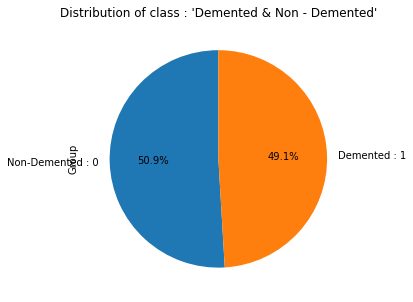

In [ ]:
# class distribution
plt.figure(figsize=(5,5))                              
pdData.groupby(['Group']).Group.count().plot(kind='pie',labels=['Non-Demented : 0','Demented : 1'],                                                         startangle=90, autopct='%1.1f%%')
plt.title("Distribution of class : 'Demented & Non - Demented'")   

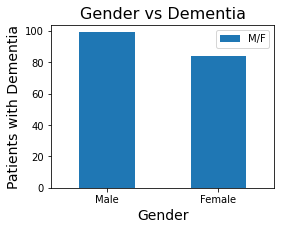

In [ ]:
# Relaionship between gender and dementia
demented_group = pdData[pdData['Group']==1]['M/F'].value_counts()
demented_group = pd.DataFrame(demented_group)
demented_group.index=['Male', 'Female']
demented_group.plot(kind='bar', figsize=(4,3))
plt.title('Gender vs Dementia', size=16)
plt.xlabel('Gender', size=14)
plt.ylabel('Patients with Dementia', size=14)
plt.xticks(rotation=0)
plt.show()

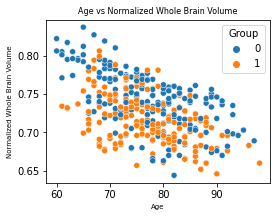

In [ ]:
# Relationship Between Age and Normalized Whole Brain Volume
# Group: 0 = Nondemented, 1 = Demented

plt.figure(figsize=(4,3))
sns.scatterplot(x='Age', y='nWBV', data=pdData, hue='Group')
plt.title('Age vs Normalized Whole Brain Volume', size=8)
plt.xlabel('Age', size=7)
plt.ylabel('Normalized Whole Brain Volume', size=7)
plt.show()

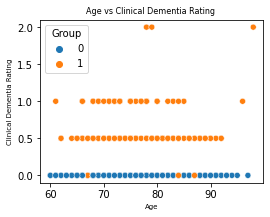

In [ ]:
# Relationship Between CDR and Dementia
plt.figure(figsize=(4,3))
sns.scatterplot(x='Age', y='CDR', data=pdData, hue='Group')
plt.title('Age vs Clinical Dementia Rating ', size=8)
plt.xlabel('Age', size=7)
plt.ylabel('Clinical Dementia Rating',size=7)
plt.show()

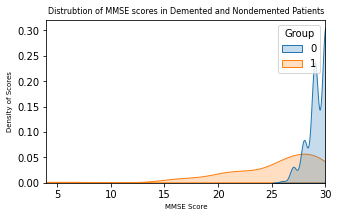

In [ ]:
# Relationship Between MMSE and Dementia
plt.figure(figsize=(5,3))
sns.kdeplot(x='MMSE', shade=True, hue='Group', data=pdData)
plt.title('Distrubtion of MMSE scores in Demented and Nondemented Patients', size=8)
plt.xlim(pdData['MMSE'].min(), pdData['MMSE'].max())
plt.xlabel('MMSE Score', size=7)
plt.ylabel('Density of Scores', size=7)
plt.show()

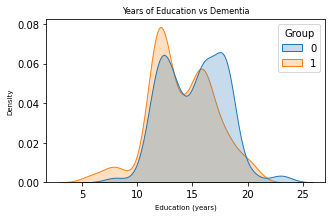

In [ ]:
#Relationship Between Education Years and Dementia
plt.figure(figsize=(5,3))
sns.kdeplot(x='EDUC', shade=True, hue='Group', data=pdData)
plt.title('Years of Education vs Dementia', size=8)
plt.xlabel('Education (years)', size=7)
plt.ylabel('Density', size=7)
plt.show()

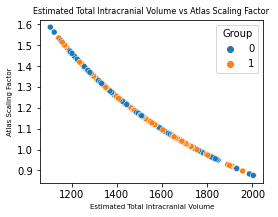

In [ ]:
#Relationship Between ASF & eTIV
plt.figure(figsize=(4,3))
sns.scatterplot(x='eTIV', y='ASF', data=pdData, hue='Group')
plt.title('Estimated Total Intracranial Volume vs Atlas Scaling Factor ', size=8)
plt.xlabel('Estimated Total Intracranial Volume', size=7)
plt.ylabel('Atlas Scaling Factor',size=7)
plt.show()

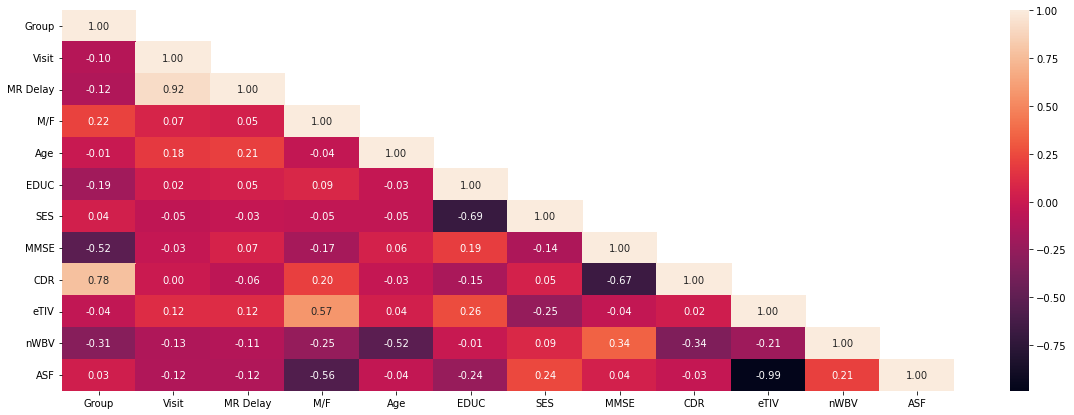

In [ ]:
# for correlation value plotting the heatmap
plt.figure(figsize=(20,7))
mask = np.zeros_like(pdData.corr())
mask[np.triu_indices_from(mask, 1)] = True
a = sns.heatmap(pdData.corr(),mask=mask, annot=True, fmt='.2f')

### **FEATURE SELECTION, FEATURE SCALING & TRAIN-TEST SPLIT**

In [ ]:
# X contains features & y contains the target class
X = pdData[['Visit','MR Delay', 'M/F', 'Age', 'EDUC', 'SES', 'MMSE', 'eTIV','CDR', 'nWBV', 'ASF']].values
y = pdData['Group'].values
DATA=pd.DataFrame(X)

In [ ]:
#@title Default title text
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy

# define random forest classifier, with utilising all cores and
# sampling in proportion to y labels
rf = RandomForestClassifier(n_jobs=-1, class_weight='balanced')

# define Boruta feature selection method
feat_selector = BorutaPy(rf, n_estimators='auto', verbose=2, random_state=1)

# find all relevant features - 5 features should be selected
feat_selector.fit(X, y)

# check selected features - first 5 features are selected
feat_selector.support_

# call transform() on X to filter it down to selected features
X_filtered = feat_selector.transform(X)

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	11
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	11
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	11
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	11
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	11
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	11
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	11
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	4
Tentative: 	4
Rejected: 	3
Iteration: 	9 / 100
Confirmed: 	4
Tentative: 	4
Rejected: 	3
Iteration: 	10 / 100
Confirmed: 	4
Tentative: 	4
Rejected: 	3
Iteration: 	11 / 100
Confirmed: 	4
Tentative: 	4
Rejected: 	3
Iteration: 	12 / 100
Confirmed: 	4
Tentative: 	3
Rejected: 	4
Iteration: 	13 / 100
Confirmed: 	4
Tentative: 	3
Rejected: 	4
Iteration: 	14 / 100
Confirmed: 	4
Tentative: 	3
Rejected: 	4
Iteration: 	15 / 100
Confirmed: 	4
Tentative: 	3
Rejected: 	4
Iteration: 	16 / 100
Confirmed: 	4
Tentative: 	3
Rejected: 	4
Iteration:

In [ ]:
feature_ranks = list(zip(DATA.columns, 
                         feat_selector.ranking_, 
                         feat_selector.support_))

# iterate through and print out the results
for feat in feature_ranks:
    print('Feature: {:<25} Rank: {},  Keep: {}'.format(feat[0], feat[1], feat[2]))

Feature: 0                         Rank: 8,  Keep: False
Feature: 1                         Rank: 5,  Keep: False
Feature: 2                         Rank: 6,  Keep: False
Feature: 3                         Rank: 3,  Keep: False
Feature: 4                         Rank: 4,  Keep: False
Feature: 5                         Rank: 7,  Keep: False
Feature: 6                         Rank: 1,  Keep: True
Feature: 7                         Rank: 1,  Keep: True
Feature: 8                         Rank: 1,  Keep: True
Feature: 9                         Rank: 1,  Keep: True
Feature: 10                        Rank: 2,  Keep: False


In [ ]:
# X contains features & y contains the target class
X = pdData[[ 'M/F', 'Age', 'EDUC','MMSE', 'eTIV','CDR', 'nWBV', 'ASF']].values
y = pdData['Group'].values

In [ ]:
#@title Default title text
#Split the data into training and test set in the ratio of 70:30 respectively
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size= 0.30, random_state=42)

df_ytrain = pd.DataFrame(y_train)
df_ytest = pd.DataFrame(y_test)

print('In Training Split:')
print(df_ytrain[0].value_counts())

print('\nIn Testing Split:')
print(df_ytest[0].value_counts())

print('Train set shape:',X_train.shape)
print('Test set shape:',X_test.shape)

In [ ]:
# startified
def split(X,y):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.30, random_state=42, stratify=y)

  # feature scaling
  scaler = StandardScaler()
  X_train = scaler.fit_transform(X_train)
  X_test = scaler.fit_transform(X_test)

  df_ytrain = pd.DataFrame(y_train)
  df_ytest = pd.DataFrame(y_test)

  print('In Training Split:')
  print(df_ytrain[0].value_counts())

  print('\nIn Testing Split:')
  print(df_ytest[0].value_counts())

  return X_train, X_test, y_train, y_test

In [ ]:
X_train, X_test, y_train, y_test = split(X,y)

In Training Split:
0    133
1    128
Name: 0, dtype: int64

In Testing Split:
0    57
1    55
Name: 0, dtype: int64


### **FUNCTIONS FOR ML ALGOTITHMS**

In [ ]:
def plot_confusion_matrix(y_test, yhat):
    cm = confusion_matrix(y_test, yhat)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax=ax, fmt='g', cmap=plt.cm.Blues, cbar=False);
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix', size=8); 
    ax.xaxis.set_ticklabels(['Nondemented', 'Demented']); ax.yaxis.set_ticklabels(['Nondemented', 'Demented'])

In [ ]:
# Logistic Regression
def LoR(X_tr,Y_tr,X_te,Y_te):
  lr = LogisticRegression(random_state=42)
  lr.fit(X_tr,Y_tr)
  lr_y_pred = lr.predict(X_te)

  # Confusion Matrix for the Logistic Regression Model
  plot_confusion_matrix(Y_te,lr_y_pred)

  # Classification Report for the Logistic Regression Model
  print("Classification Report : Logistic Regression")
  classRep = classification_report(Y_te, lr_y_pred, digits=2)
  print(classRep)

In [ ]:
# KNN
def KNN(X_tr,Y_tr,X_te,Y_te):
  # creating odd list of K for KNN
  kvalue = list(range(1,40,2))

  # creating empty list for accuracy odd different value of K
  acc = []

  # perform accuracy metrics for values from different k values
  for k in kvalue:
      knn = KNeighborsClassifier(n_neighbors=k)
      knn.fit(X_train, y_train)
      # predict 
      y_pred = knn.predict(X_test)
      # evaluate accuracy
      accuracy = accuracy_score(y_test, y_pred)
      acc.append(accuracy)

  # determining best k
  bestk = kvalue[acc.index(max(acc))]
  print("The optimal number of neighbors is %d" % bestk)
  plt.plot(kvalue,acc)

  # instantiate learning model (here k = 1)
  knn = KNeighborsClassifier(n_neighbors = bestk, weights = 'uniform', metric='euclidean')

  # fitting the model
  knn.fit(X_train, y_train)

  # predict the response
  knn_y_pred = knn.predict(X_test)

  # Confusion Matrix for the K-nearest neighbors Model
  plot_confusion_matrix(Y_te,knn_y_pred)

  # Classification Report for the K-nearest neighbors Model
  print("Classification Report : K-nearest neighbors")
  classRep = classification_report(y_test, knn_y_pred, digits=2)
  print(classRep)

In [ ]:
# Naive Bayes
def NB(X_tr,Y_tr,X_te,Y_te):
  # naive bayes
  nb = GaussianNB()
  nb.fit(X_tr , Y_tr)

  # predict the response
  nb_y_pred = nb.predict(X_te)

  # Confusion Matrix for the Naive Bayes
  plot_confusion_matrix(Y_te,nb_y_pred)

  # Classification Report for the Naive Bayes Model
  print("Classification Report : Naive Bayes")
  classRep = classification_report(Y_te, nb_y_pred, digits=2)
  print(classRep)

In [ ]:
# Decision Tree
def DT(X_tr,Y_tr,X_te,Y_te):
  # Decison Tree
  dt = DecisionTreeClassifier(random_state=42)
  dt.fit(X_tr , Y_tr)

  # predict the response
  dt_y_pred = dt.predict(X_te)

  # Confusion Matrix for the Decision Tree
  plot_confusion_matrix(Y_te,dt_y_pred)

  # Classification Report for the Decision Tree Model
  print("Classification Report : Decision Tree")
  classRep = classification_report(Y_te, dt_y_pred, digits=2)
  print(classRep)

In [ ]:
# SVM
def svm(X_tr,Y_tr,X_te,Y_te):
  # Normally, C = 1 and gamma = 'scale' are default values
  # C controls how wide the margin will be with respect to how many misclassification we are allowing
  # C is increasing --> reduce the size of the margin and fewer misclassification and vice versa
  param_grid = [
      {'C': [0.5, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 30, 50, 80, 100],
      'gamma': ['scale', 0.5, 0.125, 1, 0.1, 0.01, 0.001, 0.0001, 0.00001],
      'kernel': ['rbf', 'linear', 'poly', 'sigmoid']},
  ]

  optimal_params = GridSearchCV(SVC(),
                              param_grid,
                              cv=10, #  taking 10-fold as in k-fold cross validation
                              scoring='accuracy', 
                              verbose=0,
                              n_jobs=-1)

  optimal_params.fit(X_train, y_train)
  print(optimal_params.best_params_)

  #svm
  C = optimal_params.best_params_['C']
  gamma = optimal_params.best_params_['gamma']
  kernel = optimal_params.best_params_['kernel']

  svm = SVC(C=C, gamma=gamma, kernel=kernel)
  svm.fit(X_tr,Y_tr)

  # predict the response
  svm_y_pred = svm.predict(X_te)

  # Confusion Matrix for the Support Vector Machine Model
  plot_confusion_matrix(Y_te,svm_y_pred)

  # Classification Report for the Support Vector Machine Model
  print("Classification Report : Support Vector Machine")
  classRep = classification_report(Y_te, svm_y_pred, digits=2)
  print(classRep)

### **FUNCTIONS FOR ENSEMBLE MODELS**

In [ ]:
# ensemble stacking
def Ensemble(X_tr,Y_tr,X_te,Y_te):
  level0 = list()
  level0.append(('lr', LogisticRegression(random_state=42)))
  level0.append(('knn', KNeighborsClassifier(n_neighbors = 1, weights = 'uniform', metric='euclidean')))
  level0.append(('cart', DecisionTreeClassifier(random_state=42)))
  level0.append(('svm', SVC(C= 30, gamma= 0.125, kernel= 'rbf')))
  level0.append(('bayes', GaussianNB()))

  # define meta learner model
  level1 = LogisticRegression(random_state=42)

  # define the stacking ensemble with cross validation of 5
  Stack_model = StackingClassifier(estimators=level0, final_estimator=level1)

  # predict the response
  Stack_model.fit(X_tr, Y_tr)
  prediction_Stack = Stack_model.predict(X_te)

  # Confusion Matrix for the Stacking Model
  plot_confusion_matrix(Y_te,prediction_Stack)

  # Classification Report for the Stacking Model
  print("Classification Report : Stacking")
  print(classification_report(Y_te, prediction_Stack, digits=2))

In [ ]:
  level0 = list()
  level0.append(('lr', LogisticRegression(random_state=42)))
  level0.append(('knn', KNeighborsClassifier(n_neighbors = 1, weights = 'uniform', metric='euclidean')))
  level0.append(('cart', DecisionTreeClassifier(random_state=42)))
  level0.append(('svm', SVC(C= 30, gamma= 0.125, kernel= 'rbf')))
  level0.append(('bayes', GaussianNB()))

  # define meta learner model
  level1 = LogisticRegression(random_state=42)

In [ ]:
def RF(X_tr,Y_tr,X_te,Y_te):
  
  # Create the param grid
  param_grid = {'n_estimators': [int(x) for x in np.linspace(start = 10, stop = 100, num = 10)],# Number of trees in random forest
                'max_depth': range(1,10),# Maximum number of levels in tree
                'criterion':['gini','entropy'] }# measure the quality of a split

  optimal_params = GridSearchCV(RandomForestClassifier(),
                              param_grid,
                              cv=10, # we are taking 10-fold as in k-fold cross validation
                              scoring='accuracy', 
                              verbose=0,
                              n_jobs=-1)

  optimal_params.fit(X_train, y_train)
  print(optimal_params.best_params_)

  criterion = optimal_params.best_params_['criterion']
  max_depth = optimal_params.best_params_['max_depth']
  n_estimators = optimal_params.best_params_['n_estimators']

  #creating model of Random Forest
  RandomForest = RandomForestClassifier(n_estimators = n_estimators, max_depth=max_depth, criterion=criterion,random_state=42)
  RandomForest = RandomForest.fit(X_tr, Y_tr)

  # predict the response
  RandomForest_pred = RandomForest.predict(X_te)

  # Confusion Matrix for the Random Forest Model
  plot_confusion_matrix(Y_te,RandomForest_pred)

  # Classification Report for the Randome Forest Model
  print("Classification Report : Random Forest")
  print(classification_report(Y_te, RandomForest_pred, digits=2))    


In [ ]:
def Adaboost(X_tr,Y_tr,X_te,Y_te):
  param_grid = {'n_estimators': [int(x) for x in np.linspace(start = 10, stop = 100, num = 10)]}
  optimal_params = GridSearchCV(AdaBoostClassifier(),
                              param_grid,
                              cv=10, # we are taking 10-fold as in k-fold cross validation
                              scoring='accuracy', 
                              verbose=0,
                              n_jobs=-1)

  optimal_params.fit(X_train, y_train)
  print(optimal_params.best_params_)
  n_estimators = optimal_params.best_params_['n_estimators']
  
  #creating model of Adaptive Boosting
  AdBs = AdaBoostClassifier( n_estimators= n_estimators)
  AdBs  = AdBs.fit(X_tr, Y_tr)

  # predict the response
  AdBs_y_pred = AdBs.predict(X_te)

  # Confusion Matrix for the Adaptive Boosting Model
  plot_confusion_matrix(Y_te,AdBs_y_pred)

  # Classification Report for the Adaptive Boosting Model
  print("Classification Report : Adaptive Boosting")
  print(classification_report(Y_te, AdBs_y_pred, digits=2))

In [ ]:
def xgboost(X_tr,Y_tr,X_te,Y_te):
  param_grid = {'n_estimators': [int(x) for x in np.linspace(start = 10, stop = 100, num = 10)]}
  optimal_params = GridSearchCV(XGBClassifier(),
                              param_grid,
                              cv=10, # we are taking 10-fold as in k-fold cross validation
                              scoring='accuracy', 
                              verbose=0,
                              n_jobs=-1)

  optimal_params.fit(X_train, y_train)
  print(optimal_params.best_params_)
  n_estimators = optimal_params.best_params_['n_estimators']
  xgBs =XGBClassifier(n_estimators= n_estimators)
  xgBs  = xgBs.fit(X_tr, Y_tr)

  # predict the response
  xgBs_y_pred = xgBs.predict(X_te)

  # Confusion Matrix for the Adaptive Boosting Model
  plot_confusion_matrix(Y_te,xgBs_y_pred)

  # Classification Report for the Adaptive Boosting Model
  print("Classification Report : XG Boosting")
  print(classification_report(Y_te, xgBs_y_pred, digits=2))

### **MODEL EVALUATION**

Classification Report : Logistic Regression
              precision    recall  f1-score   support

           0       0.90      1.00      0.95        57
           1       1.00      0.89      0.94        55

    accuracy                           0.95       112
   macro avg       0.95      0.95      0.95       112
weighted avg       0.95      0.95      0.95       112



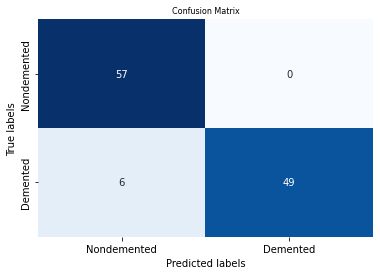

In [ ]:
LoR(X_train, y_train,X_test,y_test)

The optimal number of neighbors is 5
Classification Report : K-nearest neighbors
              precision    recall  f1-score   support

           0       0.90      0.98      0.94        57
           1       0.98      0.89      0.93        55

    accuracy                           0.94       112
   macro avg       0.94      0.94      0.94       112
weighted avg       0.94      0.94      0.94       112



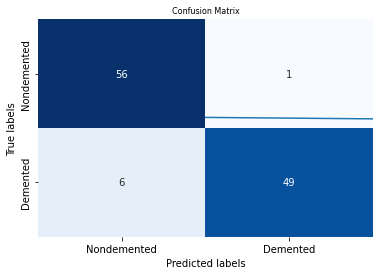

In [ ]:
KNN(X_train, y_train,X_test,y_test)

Classification Report : Naive Bayes
              precision    recall  f1-score   support

           0       0.90      1.00      0.95        57
           1       1.00      0.89      0.94        55

    accuracy                           0.95       112
   macro avg       0.95      0.95      0.95       112
weighted avg       0.95      0.95      0.95       112



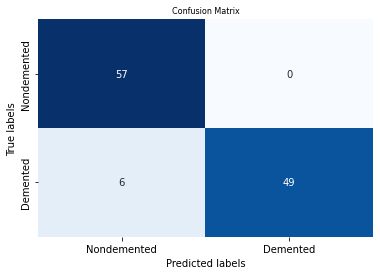

In [ ]:
NB(X_train, y_train,X_test,y_test)

Classification Report : Decision Tree
              precision    recall  f1-score   support

           0       0.90      0.91      0.90        57
           1       0.91      0.89      0.90        55

    accuracy                           0.90       112
   macro avg       0.90      0.90      0.90       112
weighted avg       0.90      0.90      0.90       112



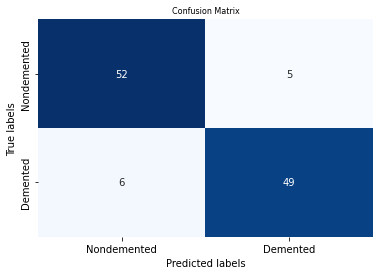

In [ ]:
DT(X_train, y_train,X_test,y_test)

{'C': 6, 'gamma': 0.5, 'kernel': 'rbf'}
Classification Report : Support Vector Machine
              precision    recall  f1-score   support

           0       0.89      0.89      0.89        57
           1       0.89      0.89      0.89        55

    accuracy                           0.89       112
   macro avg       0.89      0.89      0.89       112
weighted avg       0.89      0.89      0.89       112



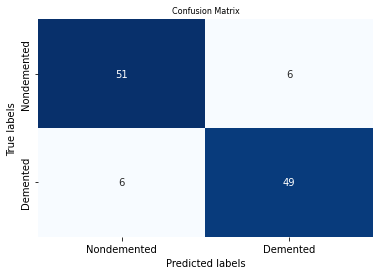

In [ ]:
svm(X_train, y_train,X_test,y_test)

Classification Report : Stacking
              precision    recall  f1-score   support

           0       0.92      0.95      0.93        57
           1       0.94      0.91      0.93        55

    accuracy                           0.93       112
   macro avg       0.93      0.93      0.93       112
weighted avg       0.93      0.93      0.93       112



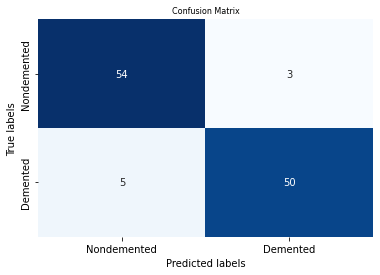

In [ ]:
Ensemble(X_train, y_train,X_test,y_test)

{'criterion': 'gini', 'max_depth': 7, 'n_estimators': 10}
Classification Report : Random Forest
              precision    recall  f1-score   support

           0       0.90      0.98      0.94        57
           1       0.98      0.89      0.93        55

    accuracy                           0.94       112
   macro avg       0.94      0.94      0.94       112
weighted avg       0.94      0.94      0.94       112



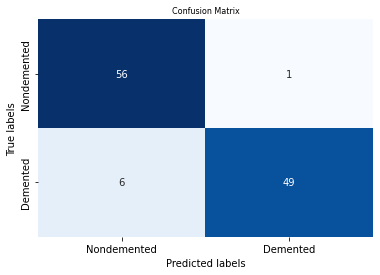

In [ ]:
RF(X_train, y_train,X_test,y_test)

{'n_estimators': 20}
Classification Report : Adaptive Boosting
              precision    recall  f1-score   support

           0       0.89      0.95      0.92        57
           1       0.94      0.87      0.91        55

    accuracy                           0.91       112
   macro avg       0.91      0.91      0.91       112
weighted avg       0.91      0.91      0.91       112



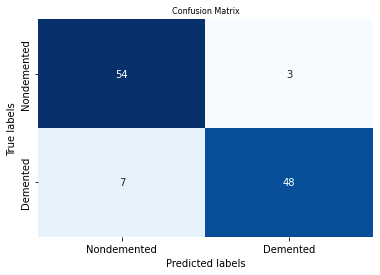

In [ ]:
Adaboost(X_train, y_train,X_test,y_test)

{'n_estimators': 20}
Classification Report : XG Boosting
              precision    recall  f1-score   support

           0       0.90      1.00      0.95        57
           1       1.00      0.89      0.94        55

    accuracy                           0.95       112
   macro avg       0.95      0.95      0.95       112
weighted avg       0.95      0.95      0.95       112



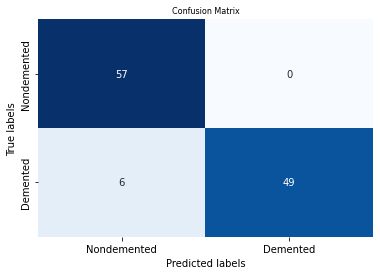

In [ ]:
xgboost(X_train, y_train,X_test,y_test)

### **5 FOLD STRATIFIED CROSS VALIDATION**

In [ ]:
def skfold(X_scaled,y):
  #Using K fold to check how the various algorighms varies throughout the dataset with 10 different subset of equal bins
  models = []
  models.append(('Logistic Regression', LogisticRegression(random_state= 42)))
  models.append(('K-NN', KNeighborsClassifier(n_neighbors = 1, weights = 'uniform', metric='euclidean')))
  models.append(('SVM', SVC(C= 30, gamma= 0.125, kernel= 'rbf')))
  models.append(('Naive Bayes',GaussianNB()))
  models.append(('Decision Tree',DecisionTreeClassifier()))
  models.append(('Stacking', StackingClassifier(estimators=level0, final_estimator=level1)))
  models.append(('Random Forest', RandomForestClassifier(criterion= 'entropy', max_depth= 8, n_estimators= 10,random_state=42)))
  models.append(('Adaptive Boosting', AdaBoostClassifier( n_estimators= 20)))
  models.append(('XG Boosting', XGBClassifier( n_estimators= 50)))


  # evaluate each model with scoring method accuracy
  print("*"*125)
  print("Accuracy of the Models")
  print("*"*125)
  Table = PrettyTable(["Model_Name","Train_Acc (mean)" ,"Test_Acc (mean)"]) 
  results_acc = []
  scoring = 'accuracy'
  for name, model in models:
      kfold = StratifiedKFold(n_splits=10)
      cv_results = model_selection.cross_validate(model, X_scaled, y, cv=kfold, scoring=scoring,return_train_score=True)
      results_acc.append(cv_results)
      Table.add_row([name,round(cv_results['train_score'].mean(),2),round(cv_results['test_score'].mean(),2) ]) 
  print(Table)


  print()
  print("*"*125)
  print("F1 score of the Models")
  print("*"*125)
  Table1 = PrettyTable(["Model_Name","Train_F1","Test_F1"]) 
  # evaluate each model with scoring method f1
  results_f1 = []
  names = []
  scoring = 'f1'
  for name, model in models:
      kfold = StratifiedKFold(n_splits=10)
      cv_results = model_selection.cross_validate(model, X_scaled,y, cv=kfold, scoring=scoring,return_train_score=True)
      results_f1.append(cv_results)
      Table1.add_row([name,round(cv_results['train_score'].mean(),2),round(cv_results['test_score'].mean(),2) ])
  print(Table1)

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

skfold(X_scaled,y)

*****************************************************************************************************************************
Accuracy of the Models
*****************************************************************************************************************************
+---------------------+------------------+-----------------+
|      Model_Name     | Train_Acc (mean) | Test_Acc (mean) |
+---------------------+------------------+-----------------+
| Logistic Regression |       0.95       |       0.95      |
|         K-NN        |       1.0        |       0.88      |
|         SVM         |       0.97       |       0.89      |
|     Naive Bayes     |       0.95       |       0.95      |
|    Decision Tree    |       1.0        |       0.89      |
|       Stacking      |       0.95       |       0.95      |
|    Random Forest    |       0.98       |       0.94      |
|  Adaptive Boosting  |       0.96       |       0.93      |
|     XG Boosting     |       0.96       |       0.95 

### **PCA**

In [ ]:
Xf = pdData[['Visit','MR Delay', 'M/F', 'Age', 'EDUC', 'SES', 'MMSE', 'eTIV','CDR', 'nWBV', 'ASF']].values
yf = pdData['Group'].values
Xf_scaled = scaler.fit_transform(Xf)

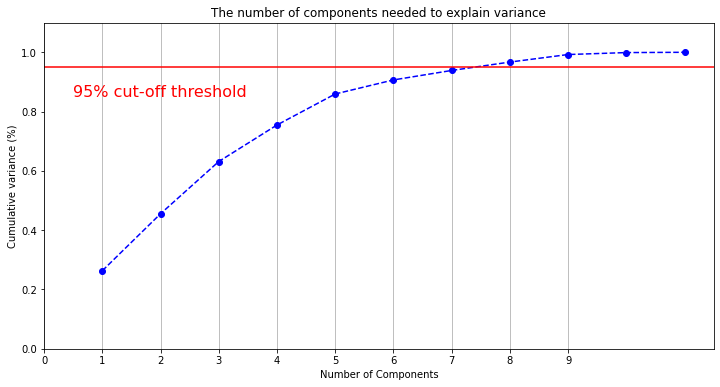

In [ ]:
from sklearn.decomposition import PCA

pca = PCA().fit(Xf_scaled)

% matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1,12, step=1)
yi = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, yi, marker='o', linestyle='--', color='b')
plt.xticks(np.arange(0, 10, step=1)) #change from 0-based array index to 1-based human-readable label
plt.xlabel('Number of Components')

plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

In [ ]:
# Set the n_components=6
principal=PCA(n_components=0.95)
principal.fit(Xf_scaled)
x_pca=principal.transform(Xf_scaled)
# Check the dimensions of data after PCA
print(x_pca.shape)

(373, 8)


In [ ]:
#@title
x_train, x_test, y_train, y_test = train_test_split(x_pca, yf, test_size= 0.30, random_state=42,stratify=y)

df_ytrain = pd.DataFrame(y_train)
df_ytest = pd.DataFrame(y_test)

print('In Training Split:')
print(df_ytrain[0].value_counts())

print('\nIn Testing Split:')
print(df_ytest[0].value_counts())

In [ ]:
#@title
LoR(x_train,y_train,x_test,y_test)

In [ ]:
#@title
NB(x_train,y_train,x_test,y_test)

In [ ]:
#@title
DT(x_train,y_train,x_test,y_test)

In [ ]:
#@title
skfold(x_pca,y)

In [ ]:
#@title PCA Hardcoded
def PCA(X_scaled, num_components):
      
  #Step-2
  cov_mat = np.cov(X_scaled , rowvar = False)
     
  #Step-3
  eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)
     
  #Step-4
  sorted_index = np.argsort(eigen_values)[::-1]
  sorted_eigenvalue = eigen_values[sorted_index]
  sorted_eigenvectors = eigen_vectors[:,sorted_index]
  print(sorted_eigenvalue )
  print()
  print(eigen_values)
  #Step-5
  eigenvector_subset = sorted_eigenvectors[:,0:num_components]
     
  #Step-6
  X_reduced = np.dot(eigenvector_subset.transpose() , X_scaled.transpose() ).transpose()
     
  return X_reduced

x=PCA(X_scaled,6)